In [1]:
import os
import numpy as np
import shutil
import matplotlib
import matplotlib.pyplot as plt
from astropy import table
from astropy.io import ascii
import cmasher as cmr
import dynamite as dyn
from plotbin import display_pixels

In [2]:
# # Get an estimate for the weights from losvd optimization (config files MUST have the same parspace)
# fname = 'F2_config11.yaml'
# c = dyn.config_reader.Configuration(fname        ,                #   |
#                                     reset_logging=True,           #   |
#                                     user_logfile='test_nnls',     #   v
#                                     reset_existing_output=True)   # 'False' saves time, use only if orblibs have been created with the current orblib_new_mirror
# _ = dyn.model_iterator.ModelIterator(config=c)
# best_model_idx = c.all_models.get_best_n_models_idx(n=1)[0]
# model = c.all_models.get_model_from_row(best_model_idx)
# parset = model.parset
# table.Table(model.parset).write('parset.ecsv', format='ascii.ecsv', overwrite=True)
# print(f'{parset=}')
# orblib = model.get_orblib()
# _ = model.get_weights(orblib)
# weights = model.weights
# print(f'{weights=}')
# orblib.read_losvd_histograms()
# print(f'{len(orblib.losvd_histograms)=}\t{len(orblib.intrinsic_masses)=}\t{len(orblib.projected_masses)=}\t{orblib.n_orbs=}')
# shutil.copyfile(model.directory + 'orbit_weights.ecsv', 'weights.ecsv')

In [3]:
# Read proper motion data
fname = 'F2_config11_with_pm.yaml'
c = dyn.config_reader.Configuration(fname,                        #   |
                                    reset_logging=True,           #   |
                                    user_logfile='test_nnls',     #   v
                                    reset_existing_output=True)   # 'False' saves time, use only if orblibs have been created with the current orblib_new_mirror
stars = c.system.get_unique_triaxial_visible_component()
stars.kinematic_data[1]

[INFO] 21:56:49 - dynamite.config_reader.Configuration - Config file F2_config11_with_pm.yaml read.
[INFO] 21:56:49 - dynamite.config_reader.Configuration - io_settings...
[INFO] 21:56:49 - dynamite.config_reader.Configuration - Output directory tree F2_output11/ removed.
[INFO] 21:56:49 - dynamite.config_reader.Configuration - Output directory tree: F2_output11/.
[INFO] 21:56:49 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 21:56:49 - dynamite.config_reader.Configuration - model_components...
[INFO] 21:56:49 - dynamite.physical_system.Component - bh: DYNAMITE will currently ignore the mandatory attribute contributes_to_potential.
[INFO] 21:56:49 - dynamite.config_reader.Configuration - dh... ignored
[INFO] 21:56:49 - dynamite.physical_system.Component - stars: DYNAMITE will currently ignore the mandatory attribute contributes_to_potential.
[WARNING] 21:56:49 - dynamite.config_reader.Configuration - Kinematics f2: the 'weight' attribute is DEPRECATED and will be 

ProperMotions({'aperturefile': 'apertureVirac2_pix4_SN500.dat', 'binfile': 'binsVirac2_pix4_SN500.dat', 'logger': <Logger dynamite.kinematics.ProperMotions (DEBUG)>, 'name': 'propermotions', 'proper_motions': True, 'datafile': 'PM_kinfile.npz', 'input_directory': 'dynamite_input/', 'data': NpzFile 'dynamite_input/PM_kinfile.npz' with keys: PM_2dhist, PM_2dhist_sigma, nstar, xvbin, yvbin..., 'n_spatial_bins': 95, 'PSF': {'sigma': [0.8], 'weight': [1.0]}, 'dp_args': {'x': array([-39., -35., -31., ...,  25.,  29.,  33.]), 'y': array([-236., -236., -236., ...,  232.,  232.,  232.]), 'dx': 4.0, 'idx_bin_to_pix': array([52, 52, 52, ..., 31, 31, 31]), 'angle': 0.0}, 'type': 'ProperMotions', 'hist_width': array([2000., 2000.]), 'hist_center': array([0., 0.]), 'hist_bins': array([91, 91]), 'with_pops': False, 'pop_cols': []})

In [4]:
p = dyn.plotter.Plotter(c)

sp_bin_idx=11
sp_bin_idx=48
sp_bin_idx=85


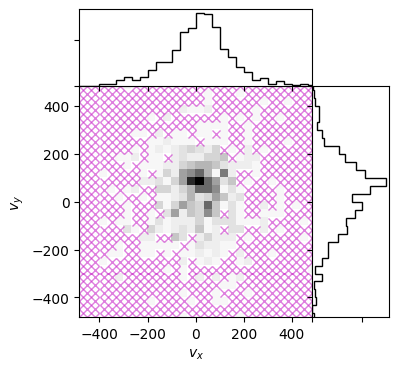

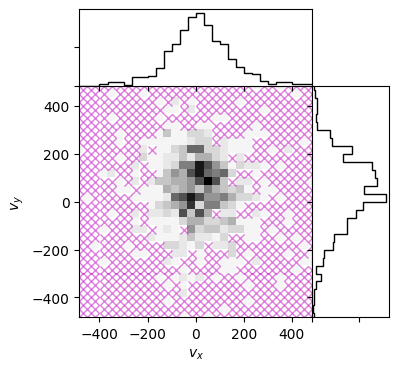

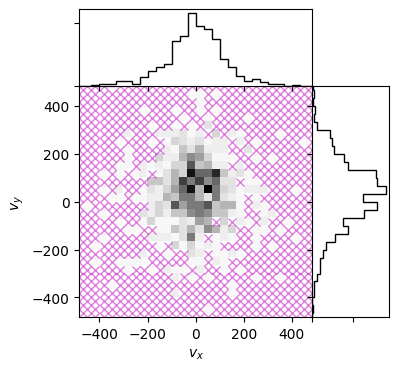

In [5]:
h2d = stars.kinematic_data[1].as_histogram2d()
for sp_bin_idx in(11, 48, 85):
    print(f'{sp_bin_idx=}')
    _ = p.hist2d_plot(h2d, orb_idx=0, sp_bin_idx=sp_bin_idx, show_1d=True, empty_bins=True)

In [6]:
sorted(stars.kinematic_data[1].data.files)

['PM_2dhist',
 'PM_2dhist_sigma',
 'PSF_sigma',
 'PSF_weight',
 'binID_dynamite',
 'dv',
 'nbins',
 'nstar',
 'nvbins',
 'xbin',
 'xvbin',
 'ybin',
 'yvbin']

In [7]:
os.chdir('/Users/maindl/Documents/DriveM/drtim/ClientsNonGAMS/DYNAMITE/dynamite/dev_tests/propermotions')
os.getcwd()

'/Users/maindl/Documents/DriveM/drtim/ClientsNonGAMS/DYNAMITE/dynamite/dev_tests/propermotions'

In [8]:
parset = ascii.read('parset.ecsv')[0]
orb_weights = ascii.read('weights.ecsv')['weights']
print(f'{parset=}')
model = dyn.model.Model(config=c, parset=parset)
model.setup_directories()
orblib = model.get_orblib()
print(f'{orblib.parset=}')
orblib.read_losvd_histograms()
print(f'{len(orblib.losvd_histograms)=}\t{len(orblib.intrinsic_masses)=}\t{len(orblib.projected_masses)=}\t{orblib.n_orbs=}')

[INFO] 21:56:51 - dynamite.model.Model - The all_models file F2_output11/all_models.ecsv does not exist - model directory set to F2_output11/models/orblib_000_000/ml01.15/.
[INFO] 21:56:51 - dynamite.orblib.LegacyOrbitLibrary - Calculating initial conditions for F2_output11/models/orblib_000_000/.


parset=<Row index=0>
       m-bh         a-bh  q-stars p-stars u-stars    ml  
     float64      float64 float64 float64 float64 float64
----------------- ------- ------- ------- ------- -------
4299916.281141509    0.01    0.29    0.94    0.99    1.15


[INFO] 21:58:07 - dynamite.orblib.LegacyOrbitLibrary - ...done - cmd_orb_start exit code 0. Logfile: F2_output11/models/orblib_000_000/datfil/orbstart.log.
[INFO] 21:58:07 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library tube and box orbits for F2_output11/models/orblib_000_000/.
[INFO] 22:22:28 - dynamite.orblib.LegacyOrbitLibrary - ...done - cmd_tube_box_orbs exit code 0. Logfiles: F2_output11/models/orblib_000_000/datfil/orblib.log, F2_output11/models/orblib_000_000/datfil/orblibbox.log, F2_output11/models/orblib_000_000/datfil/triaxmass.log, F2_output11/models/orblib_000_000/datfil/triaxmassbin.log.


orblib.parset=<Row index=0>
       m-bh         a-bh  q-stars p-stars u-stars    ml  
     float64      float64 float64 float64 float64 float64
----------------- ------- ------- ------- ------- -------
4299916.281141509    0.01    0.29    0.94    0.99    1.15
len(orblib.losvd_histograms)=2	len(orblib.intrinsic_masses)=360	len(orblib.projected_masses)=2	orblib.n_orbs=360


In [9]:
for h in orblib.losvd_histograms:
    print(f'{h}: {h.y.shape=}\n')
    mean = h.get_mean()
    sigma = h.get_sigma()
    if type(h.xedg)==tuple:
        print(f'{[x.shape for x in h.xedg]=}, {[x.shape for x in h.x]=}')
        print(f'{[x.shape for x in mean]=}\n{[x.shape for x in sigma]=}')
    else:
        print(f'{h.xedg.shape=}, {h.x.shape=}')
        print(f'{mean.shape=}\n{sigma.shape=}')

<dynamite.kinematics.Histogram object at 0x12390efd0>: h.y.shape=(360, 179, 197)

h.xedg.shape=(180,), h.x.shape=(179,)
mean.shape=(360, 197)
sigma.shape=(360, 197)
<dynamite.kinematics.Histogram2D object at 0x124c1c7d0>: h.y.shape=(360, 91, 91, 95)

[x.shape for x in h.xedg]=[(92,), (92,)], [x.shape for x in h.x]=[(91,), (91,)]
[x.shape for x in mean]=[(360, 95), (360, 95)]
[x.shape for x in sigma]=[(360, 95), (360, 95)]


vx_range=[-989.0109890109891, 989.0109890109892], vy_range=[-989.0109890109891, 989.0109890109892]


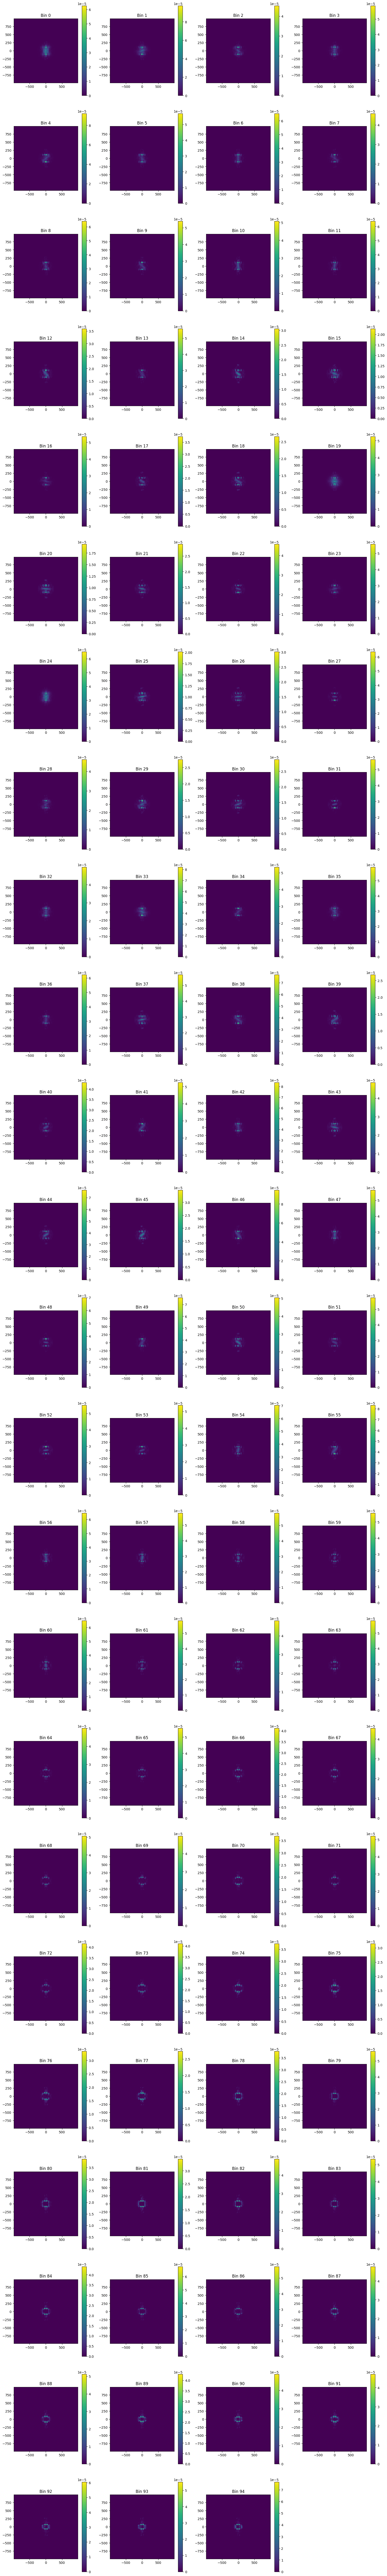

In [10]:
# plot pm histograms for all spatial bins
hist2d = orblib.losvd_histograms[1]
n_orbits = hist2d.y.shape[0]
n_bins = hist2d.y.shape[-1]

vx_range = [hist2d.x[0].min(), hist2d.x[0].max()]
vy_range = [hist2d.x[1].min(), hist2d.x[1].max()]
ratio = (vy_range[1]-vy_range[0]) / (vx_range[1]-vx_range[0])
print(f'{vx_range=}, {vy_range=}')

fig = plt.figure(figsize=(20, 20 * (n_bins // 4 // 4 + 2) * ratio))
for bin_idx in range(0, n_bins, 1):  ##################################
#    data = np.einsum('ijkl,i', hist2d.y, orb_weights)[:,:,bin_idx]
    data = np.dot(hist2d.y.T, orb_weights).T[:,:,bin_idx]
    ax = plt.subplot(n_bins // 4 + (1 if n_bins % 4 > 0 else 0), 4, bin_idx + 1)
    im = ax.imshow(data, aspect='equal', interpolation='bilinear', #cmap=cm.RdYlGn,
                   origin='lower', extent=vx_range + vy_range,
                   vmax=data.max(), vmin=0)
    fig.colorbar(im, ax=ax, shrink=1)
    ax.set_title(f'Bin {bin_idx}')

plt.show()

In [11]:
# plot pm histograms for specific bin
hist2d = orblib.losvd_histograms[1]
n_orbits = hist2d.y.shape[0]

bin_idx = 85

hist2d = orblib.losvd_histograms[1]
vx_range = [hist2d.x[0].min(), hist2d.x[0].max()]
vy_range = [hist2d.x[1].min(), hist2d.x[1].max()]
ratio = (vy_range[1]-vy_range[0]) / (vx_range[1]-vx_range[0])
print(f'{vx_range=}, {vy_range=}')

fig = plt.figure(figsize=(20, 20 * (n_orbits // 4 // 4 + 2) * ratio))
for orb_idx in range(0, n_orbits, 1):  ##################################
    data = hist2d.y[orb_idx,:,:,bin_idx]
    ax = plt.subplot(n_orbits // 4 + (1 if n_orbits % 4 > 0 else 0), 4, orb_idx + 1)
    im = ax.imshow(data, aspect='equal', interpolation='bilinear', #cmap=cm.RdYlGn,
                   origin='lower', extent=vx_range + vy_range,
                   vmax=data.max(), vmin=0)
    fig.colorbar(im, ax=ax)
    ax.set_title(f'Bin {bin_idx}, orbit {orb_idx}')

plt.show()

vx_range=[-989.0109890109891, 989.0109890109892], vy_range=[-989.0109890109891, 989.0109890109892]


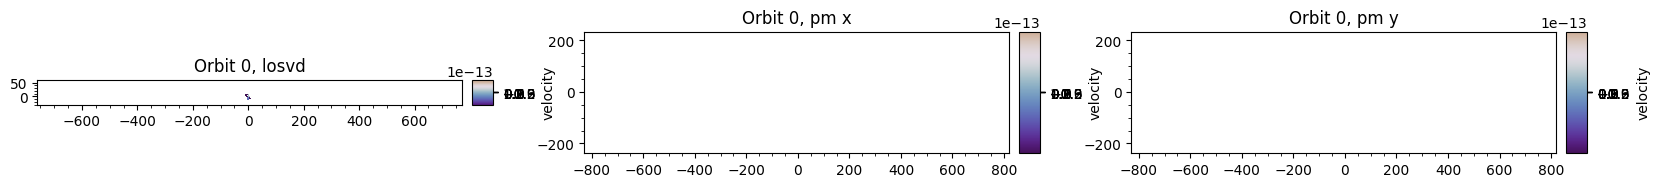

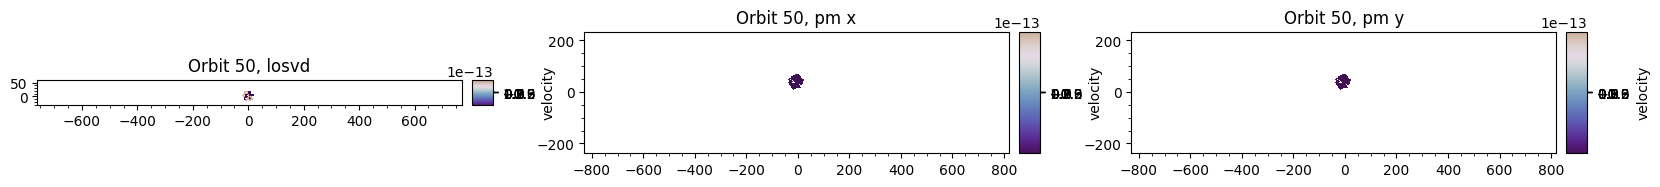

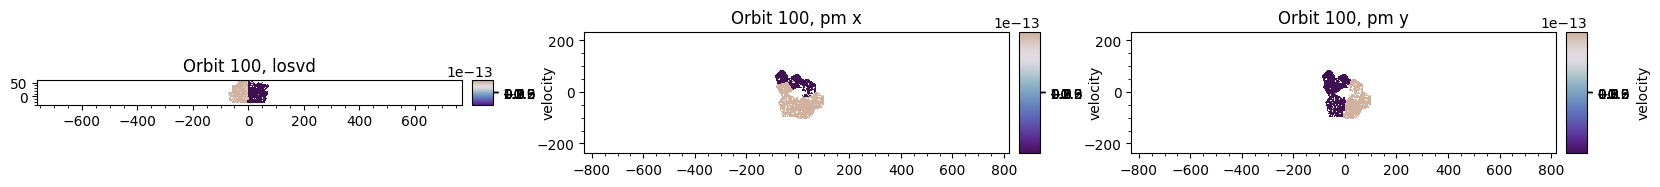

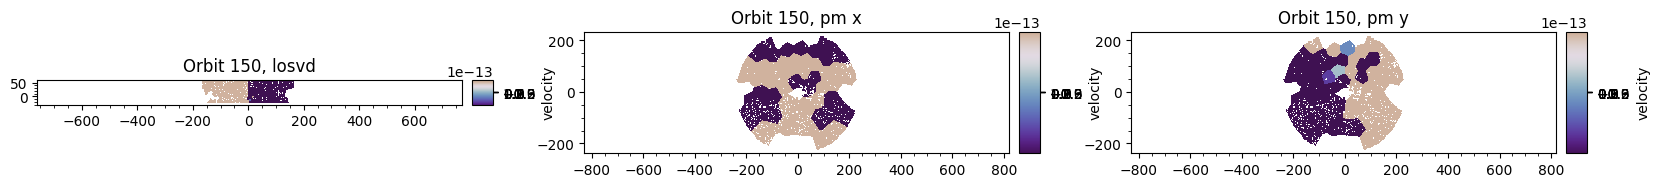

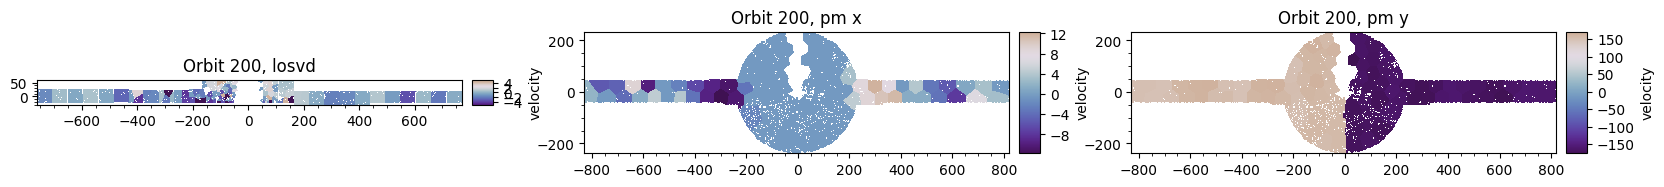

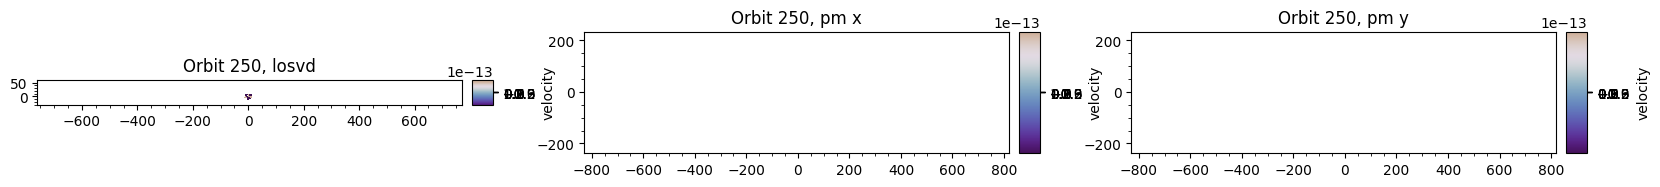

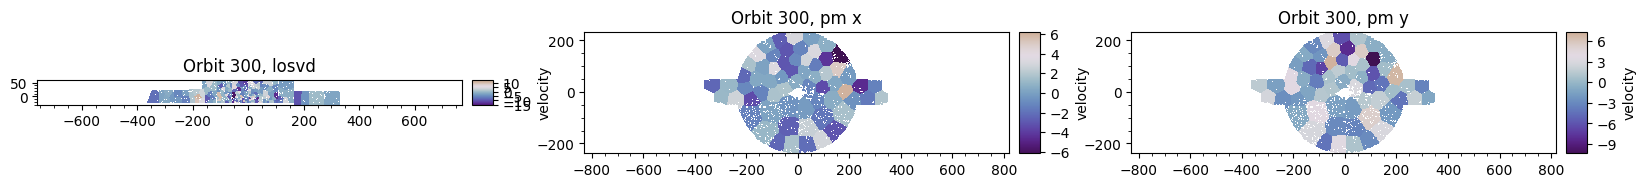

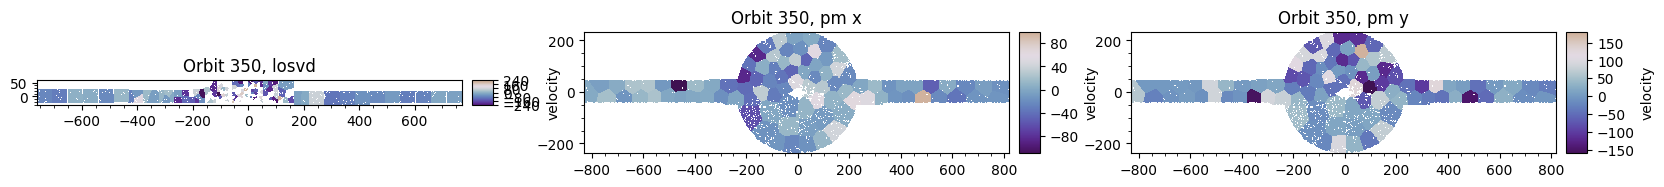

In [12]:
# plot the losvd and pm histograms' mean values
# mostly from plotter.py
orb_skip = 50
for i, orb_idx in enumerate(range(0, orblib.n_orbs, orb_skip)):

    def create_plot(dp_args, data):
        # get aperture and bin data
        x = dp_args['x']
        y = dp_args['y']
        dx = dp_args['dx']
        grid = dp_args['idx_bin_to_pix']
        angle_deg = dp_args['angle']
        # Only select the pixels that have a bin associated with them.
        s = np.ravel(np.where((grid >= 0)))
    
        #fhist, _ = np.histogram(grid[s], bins=len(data))
        #data = data / fhist
        # plot settings
        #data_min = min(data[grid[s]] / max(data))
        #data_max = max(data[grid[s]] / max(data))
        # The galaxy has NOT already rotated with PA to align major axis with x
        map1 = cmr.get_sub_cmap('twilight_shifted', 0.05, 0.6)
        kw_display_pixels1 = dict(pixelsize=dx,
                                  angle=angle_deg,
                                  colorbar=True,
                                  nticks=7,
                                  # cmap='sauron')
                                  cmap=map1)
        # PLOT THE DATA
        #plt.figure()
        #c_c = data[grid[s]] / max(data)
        c_c = data[grid[s]]
        display_pixels.display_pixels(x, y, c_c,
                                      vmin=min(data[grid[s]]), vmax=max(data[grid[s]]),
                                      label='velocity',
                                      **kw_display_pixels1)
        #plt.gca().set_title(title)
        #plt.show()

    fig = plt.figure(figsize=(20, 30))

    n_rows, n_cols = orblib.n_orbs // orb_skip + 1, 3

    ax = plt.subplot(n_rows, n_cols, n_cols * i + 1)
    if len(orblib.losvd_histograms) > 1:  # assuming that 1d histograms are first, if existing
        ax.set_title(f'Orbit {orb_idx}, losvd')
        mean = orblib.losvd_histograms[0].get_mean()[orb_idx]
        create_plot(stars.kinematic_data[0].dp_args, mean)

    idx = 1 if len(orblib.losvd_histograms) > 1 else 0  # assuming that 1d histograms are first, if existing

    ax = plt.subplot(n_rows, n_cols, n_cols * i + 2)
    ax.set_title(f'Orbit {orb_idx}, pm x')
    mean = orblib.losvd_histograms[idx].get_mean()[0][orb_idx]
    create_plot(stars.kinematic_data[idx].dp_args, mean)

    ax = plt.subplot(n_rows, n_cols, n_cols * i + 3)
    ax.set_title(f'Orbit {orb_idx}, pm y')
    mean = orblib.losvd_histograms[idx].get_mean()[1][orb_idx]
    create_plot(stars.kinematic_data[idx].dp_args, mean)

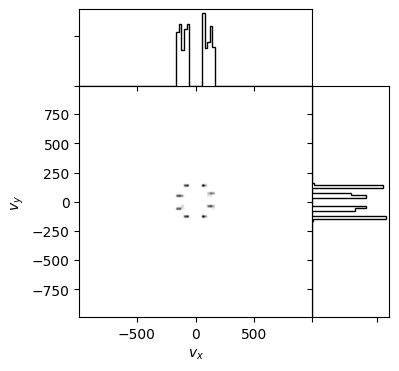

In [17]:
orb_idx = 336
sp_bin_idx = 85
_ = p.hist2d_plot(hist2d, orb_idx=orb_idx, sp_bin_idx=sp_bin_idx, show_1d=True, empty_bins=False)